### Author: [BEERAM SURYA CHANDRA](https://github.com/uniqueupsc/)
# Project 2 - Supervised Machine Learning

**Data Description**: The csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain**: Banking

**Context**: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Attribute Information**
* **`ID`**: Customer ID
* **`Age`**: Customer's age in completed years
* **`Experience`** : #years of professional experience
* **`Income`**: Annual income of the customer (thousand dollars)
* **`ZIP Code`**: Home Address ZIP code.
* **`Family`**: Family size of the customer
* **`CCAvg`**: Avg. spending on credit cards per month (thousand dollars)
* **`Education`**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **`Mortgage`**: Value of house mortgage if any. (thousand dollars)
* **`Personal Loan`**: Did this customer accept the personal loan offered in the last campaign?
* **`Securities Account`**: Does the customer have a securities account with the bank?
* **`CD Account`**: Does the customer have a certificate of deposit (CD) account with the bank?
* **`Online`**: Does the customer use internet banking facilities?
* **`Credit card`**: Does the customer use a credit card issued by bank

**Learning Outcomes**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

In [112]:
# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [113]:
# Reading the data as dataframe and print the first five rows
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [114]:
# Get info of the dataframe columns
bank.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation 1 - Dataset shape
Dataset has 5000 rows and 14 columns, with no missing values.

### Exploratory Data Analysis
Performing exploratory data analysis on the bank dataset.

In [115]:
# Five point summary of numerical attributes
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observation 2 - information on the type of variable and min-max values
* **`ID`**: categorical, qualitative, nominal variable with lowest id being 0 and highest value of id being 5000.
* **`Age`**: numerical, quantitative, ratio (has true zero, technically). Whether it's discrete or continuous depends on whether they are measured to the nearest year or not. At present, it seems it's discrete. Min age in the dataset being 23 and max being 67.
* **`Experience`**: numerical (continuous), quantitative, interval (an experience of 0 means no experience). Min experience in the dataset being -3 (which seems to be an error made while recording) and max experience being 43.
* **`Income`**: numerical (continuous), quantitative, interval (an income of 0 means no income). Min income in the dataset being 8,000 dollars while the maximum income being 224,000 dollars.
* **`ZIP Code`**: categorical (sum of two zip codes is not meaningful), qualitative, nominal.
* **`Family`**: categorical, qualitative, ordinal. Lowest family size being 1 and max being 4.
* **`CCAvg`**: numerical (continuous), quantitative, interval. Min average spending on credit cards per month being zero dollars and maximum being 10,000 dollars.
* **`Education`**: categorical, qualitative, ordinal. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* **`Mortgage`**: numerical (continuous), quantitative, interval. Min mortage value in the dataset being zero dollars, which means there was no house mortage, and maximum value being 635,000 dollars.
* **`Personal Loan`**: also the target variable. categorical (binary), qualitative, nominal. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
* **`Securities Account`**: categorical (binary), qualitative, nominal. If the customer has a securities account with the bank then 1 else 0.
* **`CD Account`**: categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
* **`Online`**: categorical (binary), qualitative, nominal. If the customer uses internet banking facilities then 1 else 0.
* **`CreditCard`**: categorical (binary), qualitative, nominal. If the customer use a credit card issued by UniversalBank then 1 else 0.

#### Observation 3 - Descriptive Statistics for the numerical variables
Descriptive statistics for the numerical variables (Age, Experience, Income, CCAvg, Mortgage)
* **`Age`**: Range of Q1 to Q3 is between 35 to 55. Since the mean is almost similar to median, we can say that Age is normally distributed.
* **`Experience`**: Range of Q1 to Q3 is between 20 to 30. Since the mean is almost similar to median, we can say that Experience is normally distributed. However, as mentioned above also, there are some recording errors in experience. We can either remove these rows (values) or else impute those to mean/median values.
* **`Income`**: Range of Q1 to Q3 is between 39 to 98. Since mean is greater than median, we can say that Income is right (positively) skewed.
* **`CCAvg`**: Range of Q1 to Q3 is between 0.70 to 2.50. Since mean is greater than median, we can say that CCAvg is right (positively) skewed.
* **`Mortgage`**: 75% of data values are around 101,000 dollars whereas the maximum value being 635,000 dollars. Mortage is highly skewed towards right.

In [116]:
# Checking the distribution of target variable
display(bank['Personal Loan'].value_counts(), bank['Personal Loan'].value_counts(normalize = True)*100)

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

#### Observation 4 - Distribution of target variable
Among 5,000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [117]:
# Checking count of negative values in Experience
bank.loc[bank['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


In [118]:
# store BEFORE
exp_before = bank['Experience'].copy()

# compute replacement
replace_value = bank.loc[
    (bank['Age'] > 23) & (bank['Age'] <= 29) &
    (bank['Income'] > 12) & (bank['Income'] < 150) &
    (bank['Personal Loan'] == 0) &
    (bank['CD Account'] == 0),
    'Experience'
].median()

# impute
bank['Experience'] = np.where(
    bank['Experience'] < 0,
    replace_value,
    bank['Experience']
)

# store AFTER
exp_after = bank['Experience']


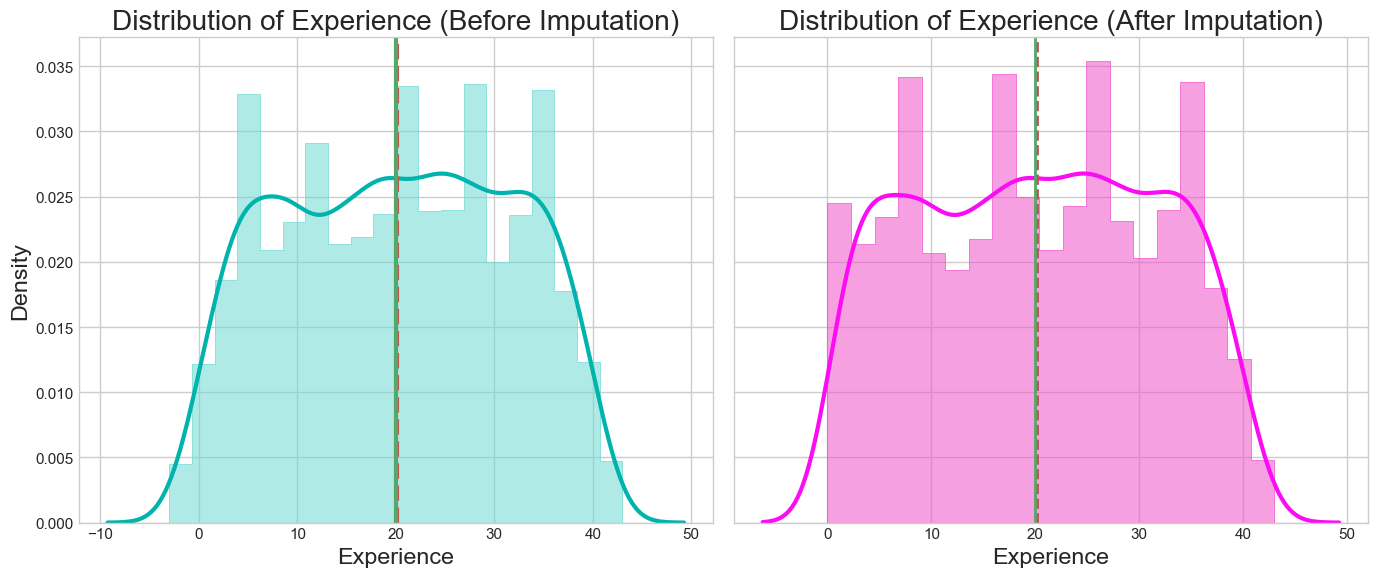

In [119]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# BEFORE colors
hist_color = '#6fdad3'   # light teal
kde_color  = '#00b3ad'   # dark teal


# -------- BEFORE --------
sns.histplot(
    exp_before,
    bins=20,
    stat='density',
    element='step',
    fill=True,
    color=hist_color,
    alpha=0.55,
    ax=axes[0]
)
sns.kdeplot(
    exp_before,
    color=kde_color,
    linewidth=3,
    ax=axes[0]
)

axes[0].axvline(exp_before.mean(), color='r', linestyle='--', linewidth=3)
axes[0].axvline(exp_before.median(), color='g', linestyle='-', linewidth=3)
axes[0].set_title('Distribution of Experience (Before Imputation)')
axes[0].set_xlabel('Experience')


# BEFORE colors
hist_color = "#f153ca"   # light teal
kde_color  = "#fb0cf3"   # dark teal




# -------- AFTER --------
sns.histplot(
    exp_after,
    bins=19,               # ✅ same bins
    stat='density',
    element='step',
    fill=True,
    color=hist_color,      # ✅ same color
    alpha=0.55,
    ax=axes[1]
)
sns.kdeplot(
    exp_after,
    color=kde_color,       # ✅ same color
    linewidth=3,
    ax=axes[1]
)

axes[1].axvline(exp_after.mean(), color='r', linestyle='--', linewidth=2)
axes[1].axvline(exp_after.median(), color='g', linestyle='-', linewidth=2)
axes[1].set_title('Distribution of Experience (After Imputation)')
axes[1].set_xlabel('Experience')

plt.tight_layout()
plt.show()


In [120]:

# Updated five point summary of Experience column
bank['Experience'].describe()

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### Observation 5 - Dealing with negative experience
The observation where experience is marked negative in the dataset is for people with **Age** range of 23-29 with median and mean being close to 24. These group of people who are marked negative experience in the dataset have **Income** ranging between 12 to 150, they didn't take **Personal Loan** that was offered to them in the earlier campaign and niether do they have **certificate of deposit** account with the bank. Used these findings to impute the negative values in experience. There's a slight but a negligible change in the value of mean from 20.1046 to 20.1404 whereas median value stays unaffected.